## Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Handling pre-processed data

In [2]:
df = pd.read_csv('../preprocess_data.csv')
df.drop(['task_2','text'], axis=1, inplace=True)
df.head()

,_id,task_1,task_3,task_4,text_clean
0,Hindi_image_1817.jpg,Sarcastic,Vulgar,Abusive,Ba8@ DaNn G@rainiD IR T३ PDBB WRHE W PRD BCEN ...
1,Hindi_image_7.jpg,Non-Sarcastic,Vulgar,Abusive,"Nari nari mat kar pagle, Nari he nark ka dwar...."
2,Hindi_image_1.jpg,Sarcastic,Non Vulgar,Abusive,Kitni push ops maarsakte ho dafly? 5 aur agar ...
3,Hindi_image_32.jpg,Sarcastic,Vulgar,Abusive,अब इसमें मेरी कहां गलती है बताओ.. तरबूज़ वाली क...
4,Hindi_image_1714.jpg,Sarcastic,Non Vulgar,Abusive,"""KUDI MENU KEHNDl... 'MENU JUTI LA DE SONIYE....."


Text(0, 0.5, 'Frequency')

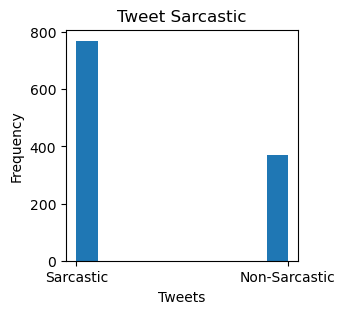

In [3]:
fig, ax = plt.subplots(figsize=(3,3))

ax.hist(df['task_1'])

ax.set_title('Tweet Sarcastic')
ax.set_xlabel('Tweets')
ax.set_ylabel('Frequency')

Text(0, 0.5, 'Frequency')

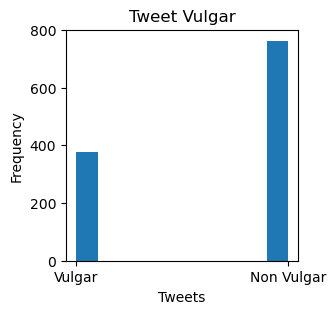

In [4]:
fig, ax = plt.subplots(figsize=(3,3))

ax.hist(df['task_3'])

ax.set_title('Tweet Vulgar')
ax.set_xlabel('Tweets')
ax.set_ylabel('Frequency')

Text(0, 0.5, 'Frequency')

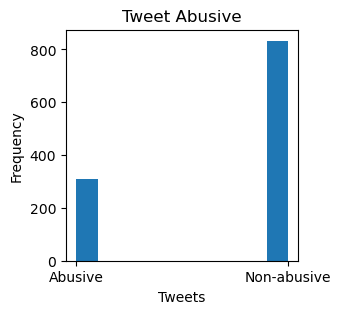

In [5]:
fig, ax = plt.subplots(figsize=(3,3))

ax.hist(df['task_4'])

ax.set_title('Tweet Abusive')
ax.set_xlabel('Tweets')
ax.set_ylabel('Frequency')

In [6]:
print(df.isnull().values.any())

True


# task_1

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfconverter = TfidfVectorizer(max_features=2000, min_df=5)
X = tfidfconverter.fit_transform(df['text_clean'].values.astype('U')).toarray()
y = df['task_1']

In [6]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 0)

In [7]:
import pickle
# 保存模型和特征转换器
with open('vectorizer.pkl', 'wb') as f:
    pickle.dump(tfidfconverter, f)

## Using various ML techniques to find the accuracy

In [8]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)
print(metrics.classification_report(y_test,y_pred))

[[41 23]
 [70 38]]
               precision    recall  f1-score   support

Non-Sarcastic       0.37      0.64      0.47        64
    Sarcastic       0.62      0.35      0.45       108

     accuracy                           0.46       172
    macro avg       0.50      0.50      0.46       172
 weighted avg       0.53      0.46      0.46       172



In [9]:
nb1 = classifier

In [10]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)
print(metrics.classification_report(y_test,y_pred))

[[  2  62]
 [  4 104]]
               precision    recall  f1-score   support

Non-Sarcastic       0.33      0.03      0.06        64
    Sarcastic       0.63      0.96      0.76       108

     accuracy                           0.62       172
    macro avg       0.48      0.50      0.41       172
 weighted avg       0.52      0.62      0.50       172



In [11]:
lr1 = classifier

In [12]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)
print(metrics.classification_report(y_test,y_pred))

[[  3  61]
 [  7 101]]
               precision    recall  f1-score   support

Non-Sarcastic       0.30      0.05      0.08        64
    Sarcastic       0.62      0.94      0.75       108

     accuracy                           0.60       172
    macro avg       0.46      0.49      0.41       172
 weighted avg       0.50      0.60      0.50       172



In [13]:
kn1 = classifier

In [14]:
from sklearn.model_selection import RepeatedKFold

In [15]:
from sklearn.svm import LinearSVC
sv = LinearSVC()

kf = RepeatedKFold(n_splits=10, n_repeats=10, random_state=None) 

bet_acc = 0.0

for train_index, test_index in kf.split(X):
      x_train, x_test = X[train_index], X[test_index] 
      y_train, y_test = y[train_index], y[test_index]

      sv.fit(x_train,y_train)
      predictions = sv.predict(x_test)

      score = accuracy_score(y_test,predictions)

      if  score > bet_acc :
        print(score)
        bet_acc = score

C:\Users\8888\Anaconda3\envs\pythonProject11\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\8888\Anaconda3\envs\pythonProject11\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\8888\Anaconda3\envs\pythonProject11\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\8888\Anaconda3\envs\pythonProject11\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warnin

0.6
0.6842105263157895
0.7130434782608696


C:\Users\8888\Anaconda3\envs\pythonProject11\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\8888\Anaconda3\envs\pythonProject11\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\8888\Anaconda3\envs\pythonProject11\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\8888\Anaconda3\envs\pythonProject11\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warnin

In [16]:
print(metrics.classification_report(y_test,predictions))

               precision    recall  f1-score   support

Non-Sarcastic       0.38      0.24      0.29        42
    Sarcastic       0.64      0.78      0.70        72

     accuracy                           0.58       114
    macro avg       0.51      0.51      0.50       114
 weighted avg       0.54      0.58      0.55       114



In [17]:
svm1 = sv

In [18]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

kf = RepeatedKFold(n_splits=10, n_repeats=10, random_state=None) 

bet_acc = 0.0

for train_index, test_index in kf.split(X):
      x_train, x_test = X[train_index], X[test_index] 
      y_train, y_test = y[train_index], y[test_index]

      rf.fit(x_train,y_train)
      predictions = rf.predict(x_test)

      score = accuracy_score(y_test,predictions)

      if  score > bet_acc :
        print(score)
        bet_acc = score

0.5739130434782609
0.6052631578947368
0.6228070175438597
0.6666666666666666
0.6842105263157895
0.6929824561403509
0.7192982456140351
0.7280701754385965


In [19]:
print(metrics.classification_report(y_test,predictions))

               precision    recall  f1-score   support

Non-Sarcastic       0.35      0.16      0.22        37
    Sarcastic       0.68      0.86      0.76        77

     accuracy                           0.63       114
    macro avg       0.52      0.51      0.49       114
 weighted avg       0.57      0.63      0.58       114



In [20]:
rf1 = rf

In [21]:
import pickle

# 假设 kn1, lr1, nb1, rf1, svm1 是你训练好的模型对象

# 保存模型
pickle.dump(kn1, open('best_KN_model1.sav', 'wb'))
pickle.dump(lr1, open('best_LR_model1.sav', 'wb'))
pickle.dump(nb1, open('best_NB_model1.sav', 'wb'))
pickle.dump(rf1, open('best_RF_model1.sav', 'wb'))
pickle.dump(svm1, open('best_SVM_model1.sav', 'wb'))

# task_3

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfconverter = TfidfVectorizer(max_features=2000, min_df=5)
X = tfidfconverter.fit_transform(df['text_clean'].values.astype('U')).toarray()
y = df['task_3']

In [10]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 0)

## Using various ML techniques to find the accuracy

In [11]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)
print(metrics.classification_report(y_test,y_pred))

[[46 73]
 [10 43]]
              precision    recall  f1-score   support

  Non Vulgar       0.82      0.39      0.53       119
      Vulgar       0.37      0.81      0.51        53

    accuracy                           0.52       172
   macro avg       0.60      0.60      0.52       172
weighted avg       0.68      0.52      0.52       172



In [12]:
nb3 = classifier

In [13]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)
print(metrics.classification_report(y_test,y_pred))

[[111   8]
 [ 46   7]]
              precision    recall  f1-score   support

  Non Vulgar       0.71      0.93      0.80       119
      Vulgar       0.47      0.13      0.21        53

    accuracy                           0.69       172
   macro avg       0.59      0.53      0.51       172
weighted avg       0.63      0.69      0.62       172



In [14]:
lr3 = classifier

In [15]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)
print(metrics.classification_report(y_test,y_pred))

[[111   8]
 [ 52   1]]
              precision    recall  f1-score   support

  Non Vulgar       0.68      0.93      0.79       119
      Vulgar       0.11      0.02      0.03        53

    accuracy                           0.65       172
   macro avg       0.40      0.48      0.41       172
weighted avg       0.51      0.65      0.55       172



In [16]:
kn3 = classifier

In [17]:
from sklearn.model_selection import RepeatedKFold

In [18]:
from sklearn.svm import LinearSVC
sv = LinearSVC()

kf = RepeatedKFold(n_splits=10, n_repeats=10, random_state=None) 

bet_acc = 0.0

for train_index, test_index in kf.split(X):
      x_train, x_test = X[train_index], X[test_index] 
      y_train, y_test = y[train_index], y[test_index]

      sv.fit(x_train,y_train)
      predictions = sv.predict(x_test)

      score = accuracy_score(y_test,predictions)

      if  score > bet_acc :
        print(score)
        bet_acc = score

C:\Users\8888\Anaconda3\envs\pythonProject11\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\8888\Anaconda3\envs\pythonProject11\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\8888\Anaconda3\envs\pythonProject11\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\8888\Anaconda3\envs\pythonProject11\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warnin

0.6695652173913044
0.6754385964912281
0.6842105263157895


C:\Users\8888\Anaconda3\envs\pythonProject11\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\8888\Anaconda3\envs\pythonProject11\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\8888\Anaconda3\envs\pythonProject11\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\8888\Anaconda3\envs\pythonProject11\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warnin

0.7017543859649122
0.7105263157894737
0.7631578947368421


C:\Users\8888\Anaconda3\envs\pythonProject11\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\8888\Anaconda3\envs\pythonProject11\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\8888\Anaconda3\envs\pythonProject11\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\8888\Anaconda3\envs\pythonProject11\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warnin

In [19]:
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

  Non Vulgar       0.64      0.82      0.72        71
      Vulgar       0.43      0.23      0.30        43

    accuracy                           0.60       114
   macro avg       0.54      0.52      0.51       114
weighted avg       0.56      0.60      0.56       114



In [20]:
svm3 = sv

In [21]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

kf = RepeatedKFold(n_splits=10, n_repeats=10, random_state=None) 

bet_acc = 0.0

for train_index, test_index in kf.split(X):
      x_train, x_test = X[train_index], X[test_index] 
      y_train, y_test = y[train_index], y[test_index]

      rf.fit(x_train,y_train)
      predictions = rf.predict(x_test)

      score = accuracy_score(y_test,predictions)

      if  score > bet_acc :
        print(score)
        bet_acc = score

0.6782608695652174
0.7280701754385965
0.7456140350877193


In [22]:
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

  Non Vulgar       0.72      0.94      0.81        78
      Vulgar       0.58      0.19      0.29        36

    accuracy                           0.70       114
   macro avg       0.65      0.57      0.55       114
weighted avg       0.67      0.70      0.65       114



In [23]:
rf3 = rf

In [24]:
import pickle

# 假设 kn3, lr3, nb3, rf3, svm3 是你训练好的模型对象

# 保存模型
pickle.dump(kn3, open('best_KN_model3.sav', 'wb'))
pickle.dump(lr3, open('best_LR_model3.sav', 'wb'))
pickle.dump(nb3, open('best_NB_model3.sav', 'wb'))
pickle.dump(rf3, open('best_RF_model3.sav', 'wb'))
pickle.dump(svm3, open('best_SVM_model3.sav', 'wb'))

# task_4

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfconverter = TfidfVectorizer(max_features=2000, min_df=5)
X = tfidfconverter.fit_transform(df['text_clean'].values.astype('U')).toarray()
y = df['task_4']

In [27]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 0)

## Using various ML techniques to find the accuracy

In [28]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)
print(metrics.classification_report(y_test,y_pred))

[[27 11]
 [74 60]]
              precision    recall  f1-score   support

     Abusive       0.27      0.71      0.39        38
 Non-abusive       0.85      0.45      0.59       134

    accuracy                           0.51       172
   macro avg       0.56      0.58      0.49       172
weighted avg       0.72      0.51      0.54       172



In [29]:
nb4 = classifier

In [30]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)
print(metrics.classification_report(y_test,y_pred))

[[  4  34]
 [  0 134]]
              precision    recall  f1-score   support

     Abusive       1.00      0.11      0.19        38
 Non-abusive       0.80      1.00      0.89       134

    accuracy                           0.80       172
   macro avg       0.90      0.55      0.54       172
weighted avg       0.84      0.80      0.73       172



In [31]:
lr4 = classifier

In [32]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)
print(metrics.classification_report(y_test,y_pred))

[[  2  36]
 [  2 132]]
              precision    recall  f1-score   support

     Abusive       0.50      0.05      0.10        38
 Non-abusive       0.79      0.99      0.87       134

    accuracy                           0.78       172
   macro avg       0.64      0.52      0.48       172
weighted avg       0.72      0.78      0.70       172



In [33]:
kn4 = classifier

In [34]:
from sklearn.model_selection import RepeatedKFold

In [35]:
from sklearn.svm import LinearSVC
sv = LinearSVC()

kf = RepeatedKFold(n_splits=10, n_repeats=10, random_state=None) 

bet_acc = 0.0

for train_index, test_index in kf.split(X):
      x_train, x_test = X[train_index], X[test_index] 
      y_train, y_test = y[train_index], y[test_index]

      sv.fit(x_train,y_train)
      predictions = sv.predict(x_test)

      score = accuracy_score(y_test,predictions)

      if  score > bet_acc :
        print(score)
        bet_acc = score

C:\Users\8888\Anaconda3\envs\pythonProject11\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\8888\Anaconda3\envs\pythonProject11\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\8888\Anaconda3\envs\pythonProject11\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\8888\Anaconda3\envs\pythonProject11\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warnin

0.6956521739130435
0.7280701754385965
0.7368421052631579
0.7543859649122807


C:\Users\8888\Anaconda3\envs\pythonProject11\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\8888\Anaconda3\envs\pythonProject11\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\8888\Anaconda3\envs\pythonProject11\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\8888\Anaconda3\envs\pythonProject11\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warnin

0.7913043478260869


C:\Users\8888\Anaconda3\envs\pythonProject11\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\8888\Anaconda3\envs\pythonProject11\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\8888\Anaconda3\envs\pythonProject11\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\8888\Anaconda3\envs\pythonProject11\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warnin

0.7982456140350878


C:\Users\8888\Anaconda3\envs\pythonProject11\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\8888\Anaconda3\envs\pythonProject11\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\8888\Anaconda3\envs\pythonProject11\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\8888\Anaconda3\envs\pythonProject11\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warnin

In [36]:
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

     Abusive       0.38      0.28      0.32        36
 Non-abusive       0.70      0.79      0.75        78

    accuracy                           0.63       114
   macro avg       0.54      0.54      0.53       114
weighted avg       0.60      0.63      0.61       114



In [37]:
svm4 = sv

In [38]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

kf = RepeatedKFold(n_splits=10, n_repeats=10, random_state=None) 

bet_acc = 0.0

for train_index, test_index in kf.split(X):
      x_train, x_test = X[train_index], X[test_index] 
      y_train, y_test = y[train_index], y[test_index]

      rf.fit(x_train,y_train)
      predictions = rf.predict(x_test)

      score = accuracy_score(y_test,predictions)

      if  score > bet_acc :
        print(score)
        bet_acc = score

0.7913043478260869
0.8157894736842105
0.8245614035087719


In [39]:
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

     Abusive       0.53      0.29      0.38        34
 Non-abusive       0.75      0.89      0.81        80

    accuracy                           0.71       114
   macro avg       0.64      0.59      0.59       114
weighted avg       0.68      0.71      0.68       114



In [40]:
rf4 = rf

In [41]:
import pickle

# 假设 kn4, lr4, nb4, rf4, svm4 是你训练好的模型对象

# 保存模型
pickle.dump(kn4, open('best_KN_model4.sav', 'wb'))
pickle.dump(lr4, open('best_LR_model4.sav', 'wb'))
pickle.dump(nb4, open('best_NB_model4.sav', 'wb'))
pickle.dump(rf4, open('best_RF_model4.sav', 'wb'))
pickle.dump(svm4, open('best_SVM_model4.sav', 'wb'))